data analisis of day 9-11-22

In [2]:
data = open("data.txt", "r")
data_all = []
for row in data:
    row = row.replace("\n", "")
    row_list_aus = row.split("\t")
    row_list = [float(row_list_element) for row_list_element in row_list_aus] 
    data_all.append(row_list)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.DataFrame(data_all, columns=["alignment", "with", "with_std", "without", "without_std", "seeds", "seeds_std", "diff", "detuning", "time", "power_IR", "peak_density", "N_atoms_MOT", "radius_MOT", "goodness"])
df

,alignment,with,with_std,without,without_std,seeds,seeds_std,diff,detuning,time,power_IR,peak_density,N_atoms_MOT,radius_MOT,goodness
0,0.0,8.44,0.51,2.96,0.25,4.33,0.28,1.15,50.0,100.0,47.0,2.5,116000.0,66.0,0.0
1,1.0,8.72,0.41,2.88,0.23,3.12,0.27,2.72,50.0,100.0,47.0,2.5,116000.0,66.0,0.0
2,2.0,10.35,0.39,2.55,0.22,3.13,0.24,4.67,50.0,100.0,47.0,2.5,116000.0,66.0,0.0
3,3.0,9.40,0.46,2.45,0.27,3.27,0.25,3.68,50.0,100.0,47.0,2.5,116000.0,66.0,0.0
4,4.0,8.26,0.45,2.79,0.25,3.62,0.27,1.85,50.0,100.0,47.0,2.5,116000.0,66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,24.0,10.25,0.31,2.80,0.19,5.29,0.25,2.16,80.0,100.0,62.0,3.0,214000.0,75.0,0.0
62,25.0,6.79,0.38,5.06,0.31,2.03,0.19,-0.30,50.0,100.0,49.0,3.0,214000.0,75.0,0.0
63,25.0,6.57,0.35,3.62,0.27,3.22,-0.23,-0.27,50.0,100.0,40.4,3.0,214000.0,75.0,0.0
64,25.0,7.33,0.42,3.80,0.22,2.46,0.22,1.07,50.0,100.0,40.4,3.0,214000.0,75.0,0.0


In [5]:
df["alignment"]

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
61    24.0
62    25.0
63    25.0
64    25.0
65    25.0
Name: alignment, Length: 66, dtype: float64

In [13]:
plt.figure(figsize=(10,10))
plt.plot(df["radius_MOT"][], df["without"][df["power_IR"] in [47, 40]], "*")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x720 with 0 Axes>

[1.2816221649687285, 1.2203622724256957, 1.0561049261121427, 0.5528163308836037]
[1.1552541905996097, 1.1248626922073681, 0.3553541096003767, 1.0373528811354409, 0.9872975941562236]


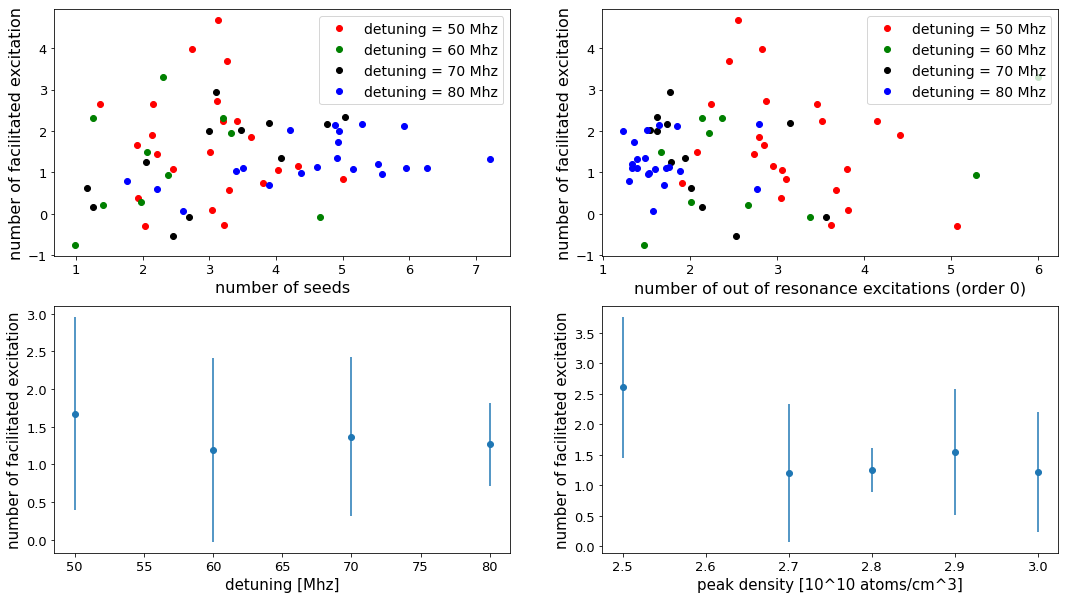

In [7]:
#plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(18,10))

plt.subplot(221)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(df["seeds"][df["detuning"]==50],df["diff"][df["detuning"]==50], "o", color="red", label="detuning = 50 Mhz")
plt.plot(df["seeds"][df["detuning"]==60],df["diff"][df["detuning"]==60], "o", color="green", label="detuning = 60 Mhz")
plt.plot(df["seeds"][df["detuning"]==70],df["diff"][df["detuning"]==70], "o", color="black", label="detuning = 70 Mhz")
plt.plot(df["seeds"][df["detuning"]==80],df["diff"][df["detuning"]==80], "o", color="blue", label="detuning = 80 Mhz")
plt.xlabel("number of seeds",fontsize=16)
plt.ylabel("number of facilitated excitation",fontsize=16)
plt.legend(fontsize=14)

plt.subplot(222)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(df["without"][df["detuning"]==50],df["diff"][df["detuning"]==50], "o", color="red", label="detuning = 50 Mhz")
plt.plot(df["without"][df["detuning"]==60],df["diff"][df["detuning"]==60], "o", color="green", label="detuning = 60 Mhz")
plt.plot(df["without"][df["detuning"]==70],df["diff"][df["detuning"]==70], "o", color="black", label="detuning = 70 Mhz")
plt.plot(df["without"][df["detuning"]==80],df["diff"][df["detuning"]==80], "o", color="blue", label="detuning = 80 Mhz")
plt.xlabel("number of out of resonance excitations (order 0)",fontsize=16)
plt.ylabel("number of facilitated excitation",fontsize=16)
plt.legend(fontsize=14)

plt.subplot(223)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

means = [np.mean(df["diff"][df["detuning"]==i]) for i in [50, 60, 70, 80]]
stds = [np.std(df["diff"][df["detuning"]==i]) for i in [50, 60, 70, 80]]
print(stds)
plt.errorbar([50, 60, 70, 80], means, stds, linestyle="", marker="o")
#plt.plot(df["without"][df["detuning"]==60],df["diff"][df["detuning"]==60], "o", color="green", label="detuning = 60 Mhz")
#plt.plot(df["without"][df["detuning"]==70],df["diff"][df["detuning"]==70], "o", color="black", label="detuning = 70 Mhz")
#plt.plot(df["without"][df["detuning"]==80],df["diff"][df["detuning"]==80], "o", color="blue", label="detuning = 80 Mhz")
plt.xlabel("detuning [Mhz]",fontsize=15)
plt.ylabel("number of facilitated excitation",fontsize=15)
#plt.legend(fontsize=14)

plt.subplot(224)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
means = [np.mean(df["diff"][df["peak_density"]==i]) for i in [2.5, 2.7, 2.8, 2.9, 3]]
stds = [np.std(df["diff"][df["peak_density"]==i]) for i in [2.5, 2.7, 2.8, 2.9, 3]]
print(stds)
plt.errorbar([2.5, 2.7, 2.8, 2.9, 3], means, stds, linestyle="", marker="o")
#plt.plot(df["without"][df["detuning"]==60],df["diff"][df["detuning"]==60], "o", color="green", label="detuning = 60 Mhz")
#plt.plot(df["without"][df["detuning"]==70],df["diff"][df["detuning"]==70], "o", color="black", label="detuning = 70 Mhz")
#plt.plot(df["without"][df["detuning"]==80],df["diff"][df["detuning"]==80], "o", color="blue", label="detuning = 80 Mhz")
plt.xlabel("peak density [10^10 atoms/cm^3]",fontsize=15)
plt.ylabel("number of facilitated excitation",fontsize=15)
#plt.legend(fontsize=14)


plt.show()
